In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
engine = create_engine("postgresql://postgres:@localhost:5432/postgres")
# подключение к базе данных PostgreSQL с помощью SQLAlchemy
df = pd.read_sql("""
SELECT *
FROM netflix
LIMIT 10
""", engine) 
# получение первых 10 строк таблицы netflix из базы 
# данных PostgreSQL и сохранение результата в DataFrame 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df = pd.read_sql("""
SELECT country, COUNT(*) AS cnt
FROM netflix
GROUP BY country
ORDER BY cnt DESC
LIMIT 20
""", engine)
df


,country,cnt
0,United States,2818
1,India,972
2,,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


<Axes: xlabel='country'>

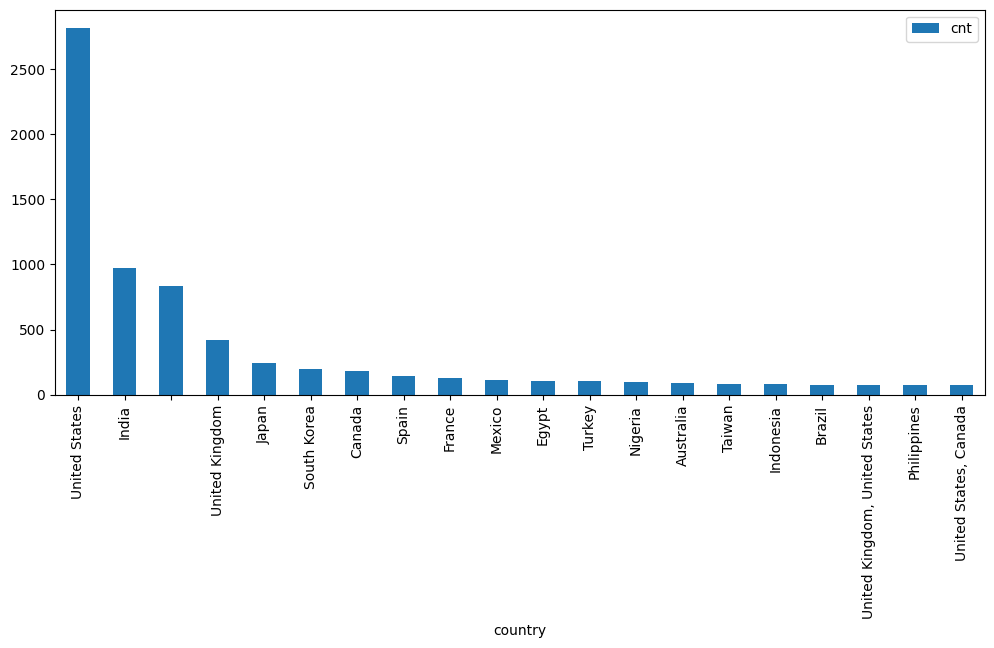

In [5]:
df.plot(kind='bar', x='country', y='cnt', figsize=(12,5)) 
# построение столбчатой диаграммы количества шоу по странам

In [6]:
df = pd.read_sql("""
SELECT type, COUNT(*)
FROM netflix
GROUP BY type
""", engine) # запрос к базе данных PostgreSQL и сохранение результата в DataFrame
df 


,type,count
0,Movie,6131
1,TV Show,2676


In [8]:
df = pd.read_sql("""
SELECT country, release_year, COUNT(*) AS cnt
FROM netflix
WHERE release_year >= 2000 
GROUP BY country, release_year
ORDER BY cnt DESC 
""", engine) 
# запрос к базе данных PostgreSQL и сохранение результата в DataFrame    
df

,country,release_year,cnt
0,United States,2018,356
1,United States,2017,352
2,United States,2019,351
3,United States,2020,336
4,United States,2016,263
...,...,...,...
1544,"Canada, Nigeria, United States",2015,1
1545,"Japan, United States",2017,1
1546,"United Kingdom, Singapore",2017,1
1547,"France, Algeria",2020,1


In [9]:
df.head()

,country,release_year,cnt
0,United States,2018,356
1,United States,2017,352
2,United States,2019,351
3,United States,2020,336
4,United States,2016,263


In [10]:
df_yearly = df.groupby('release_year')['cnt'].sum()
df

,country,release_year,cnt
0,United States,2018,356
1,United States,2017,352
2,United States,2019,351
3,United States,2020,336
4,United States,2016,263
...,...,...,...
1544,"Canada, Nigeria, United States",2015,1
1545,"Japan, United States",2017,1
1546,"United Kingdom, Singapore",2017,1
1547,"France, Algeria",2020,1


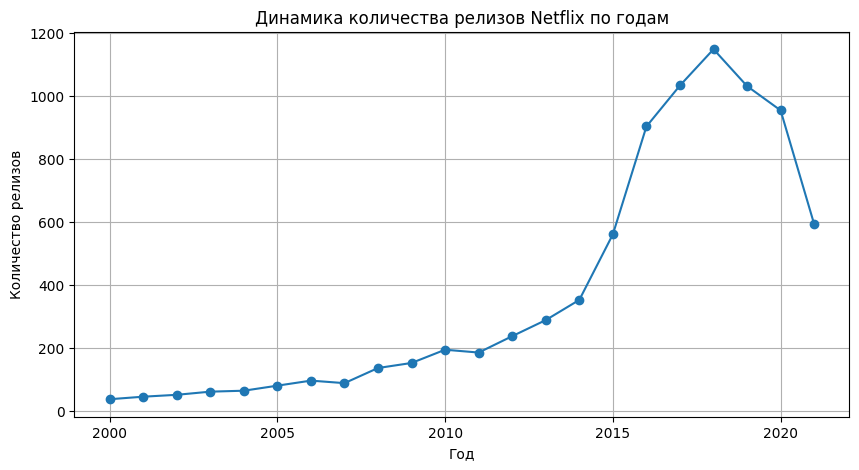

In [11]:
yearly = df.groupby('release_year')['cnt'].sum()
# агрегирование данных по годам выпуска и подсчет 
# общего количества релизов за каждый год
yearly.plot(kind='line', figsize=(10,5), marker='o')  
plt.title('Динамика количества релизов Netflix по годам')
plt.xlabel('Год')
plt.ylabel('Количество релизов')
plt.grid(True)
plt.show() # построение линейного графика 
# динамики количества релизов Netflix по годам


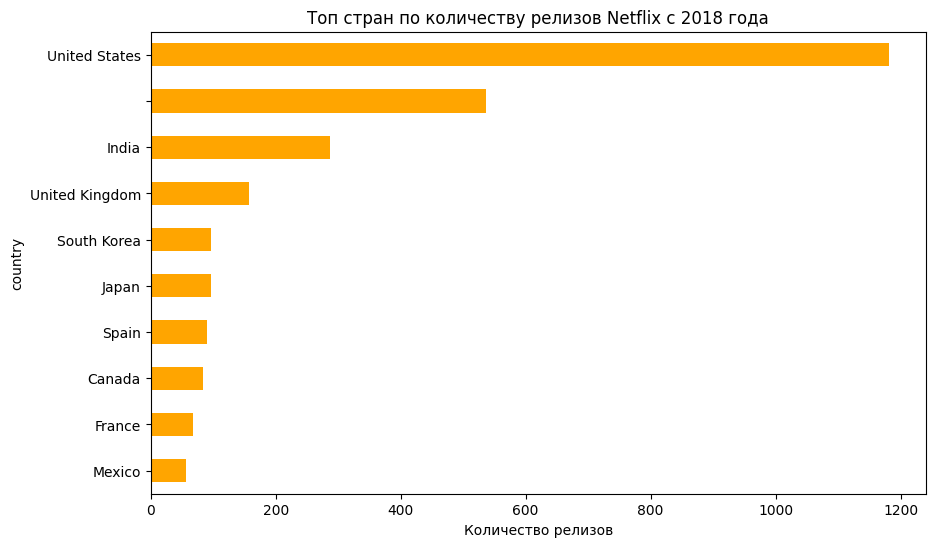

In [12]:
recent = df[df['release_year'] >= 2018]  # последние 5 лет, например
recent_top = recent.groupby('country')['cnt'].sum().sort_values(ascending=False).head(10)
# агрегирование данных по странам за последние годы и выбор топ-10 стран
recent_top.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Топ стран по количеству релизов Netflix с 2018 года')
plt.xlabel('Количество релизов')
plt.gca().invert_yaxis()
plt.show()


In [13]:
df['percent'] = df['cnt'] / df['cnt'].sum() * 100
df[['country','percent']].groupby('country').sum().sort_values(by='percent', ascending=False).head(10)
# расчет процента релизов по странам и вывод топ-10 стран

,percent
country,
United States,31.067375
India,10.758271
,9.756098
United Kingdom,4.841826
Japan,2.861628
South Korea,2.402801
Canada,2.161314
Spain,1.750785
France,1.485149


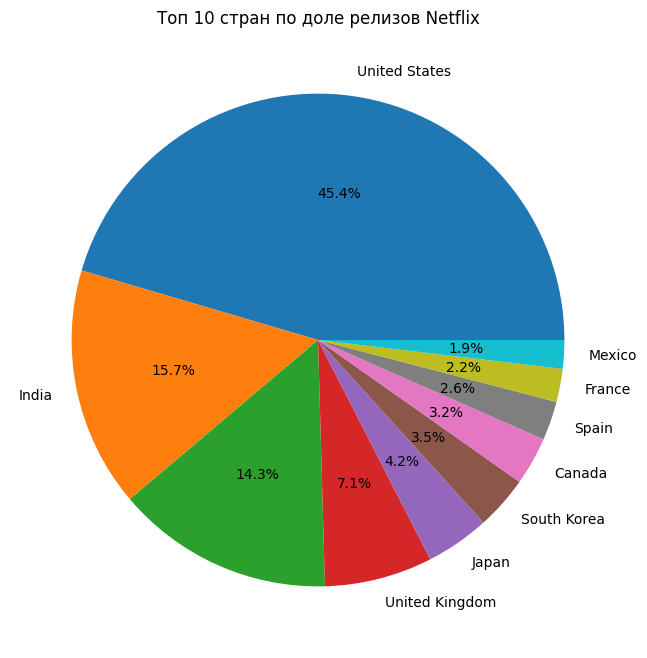

In [14]:
top10_percent = df.groupby('country')['percent'].sum().sort_values(ascending=False).head(10)
top10_percent.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Топ 10 стран по доле релизов Netflix')
plt.ylabel('')
plt.show()


In [15]:
df = pd.read_csv(r"C:\Jupyter_notebook\PandasNumPyCourse\data\netflix_titles.csv.csv")
df.head() # первые строки, чтобы увидеть названия колонок и примеры данных
# информация о датафрейме

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.info() # получение статистического резюме по числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.describe() # узнаем основные статистические показатели по числовым столбцам

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [18]:
df['type'].value_counts() # подсчет уникальных значений в столбце 'type'


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [19]:
df['listed_in'].str.split(', ').explode().value_counts().head(10) 


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

<Axes: xlabel='release_year'>

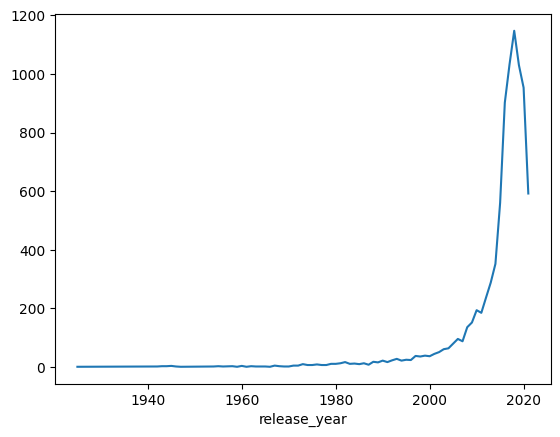

In [20]:
df['release_year'].value_counts().sort_index().plot(kind='line') 
# график количества фильмов и сериалов по годам выпуска 


In [21]:
df['director'].value_counts().head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64